In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

df = pd.read_csv("data/zipfel_zapf.csv")
df_density = pd.read_excel('../density.xlsx')
df_post = pd.read_csv('../post-codes.csv')


In [2]:
# Salary Overview
salary_dict = {}
for s in df['Salary']:
    if s in salary_dict:
        salary_dict[s] += 1
    else:
        salary_dict[s] = 1
print(salary_dict)

{'Marktüblich': 45, '20-25 CHF': 10, '25-30 CHF': 3, '30-35 CHF': 4}


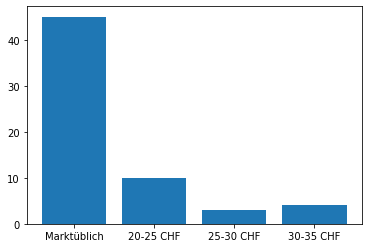

In [3]:
import numpy as np
import matplotlib.pyplot as plt
names = list(salary_dict.keys())
values = list(salary_dict.values())

plt.bar(range(len(salary_dict)), values, tick_label=names)
plt.show()

In [4]:
# Frequency Overview
freq_dict = {}
for f in df['Freq']:
    if f in freq_dict:
        freq_dict[f] += 1
    else:
        freq_dict[f] = 1
print(freq_dict)

{'Regelmässig': 51, 'Einmalig': 2, 'Mehrmalig': 9}


In [5]:
def city(row):
    l = row['Location'].split()
    return l[0]
        
df['City'] = df.apply(city, axis=1)

df = df.merge(df_post.drop_duplicates(['post_district']), right_on = 'post_district', left_on = 'City', how = 'inner')
df

,Date,Position,Freq,Salary,StartDate,Location,Days,City,Post Code,post_district,comment,country_code,region,town,lat,lng
0,15.10.2023,Nanny,Regelmässig,Marktüblich,Februar/März 2024,Aarau - Aargau,1 Tag à ca 8-9 Stunden,Aarau,5000,Aarau,NaN,CH,AG,Aarau,47.387958,8.044136
1,06.10.2023,Nanny,Regelmässig,25-30 CHF,sofort,Schaffhausen - Schaffhausen,"Donnerstag, ~9 Stunden ab 7.45 Uhr",Schaffhausen,8200,Schaffhausen,NaN,CH,SH,Schaffhausen,47.711418,8.626545
2,06.10.2023,Nanny,Regelmässig,Marktüblich,NaN,Flawil (SG),1 bis 2 Tage,Flawil,9230,Flawil,NaN,CH,SG,Flawil,47.413371,9.187030
3,25.09.2023,Nanny,Regelmässig,Marktüblich,01.01.2024,Stüsslingen - Solothurn,"Mo, Mi, Do, Fr; 8h/Tag",Stüsslingen,4655,Stüsslingen,NaN,CH,SO,Stüsslingen,47.393752,7.970652
4,14.09.2023,Nanny,Regelmässig,Marktüblich,Nach Absprache,Rombach - Aargau,Dienstag 7-18 Uhr,Rombach,5022,Rombach,NaN,CH,AG,Rombach,47.403250,8.047435
5,09.09.2023,Babysitter oder Nanny,Regelmässig,Marktüblich,So bald als möglich,Jona - St. Gallen,4-6 Stunden an einem Tag (Freitag) optional Mi...,Jona,8645,Jona,NaN,CH,SG,Jona,47.230190,8.845540
6,07.09.2023,Nanny,Regelmässig,20-25 CHF,01.01.2024,Hallwil - Aargau,"Di bis Fr oder Mo bis Do, 34 Stunden",Hallwil,5705,Hallwil,NaN,CH,AG,Hallwil,47.329966,8.174391
7,24.08.2023,Nanny vor Ort,Regelmässig,25-30 CHF,01.11.2023 - 31.01.2024,Kloten - Zürich,3 Tage a 3-4 Stunden,Kloten,8302,Kloten,NaN,CH,ZH,Kloten,47.449512,8.582165
8,22.08.2023,Kinderbetreuung,Regelmässig,20-25 CHF,NaN,Winterthur - Zürich,0.5-2.5 Tage / Woche,Winterthur,8400,Winterthur,NaN,CH,ZH,Winterthur,47.485687,8.729292
9,17.08.2023,Nanny,Einmalig,Marktüblich,NaN,Brüttisellen - Zürich,1 Tag,Brüttisellen,8306,Brüttisellen,NaN,CH,ZH,Brüttisellen,47.423190,8.629710


In [6]:
# Data group by post code
df_count = df.groupby(['Post Code']).size().reset_index(name = 'Counts')
df_count

,Post Code,Counts
0,2544,1
1,3672,1
2,4655,1
3,5000,1
4,5022,1
5,5603,1
6,5643,1
7,5705,1
8,6430,1
9,8000,5


In [7]:
# Merge grouped aby data with density.csv
df = df_count.merge(df_density,on = 'Post Code',how = 'left')
df = df.dropna(subset = ['Density'])
df['gig_per'] = 100*df['Counts']/df['Population']
# Define urban column
df['urban'] = 'unknown'
df.loc[df['Density']<400, 'urban'] = 'rural'
df.loc[(df['Density']>=400) & (df['Density']<1500), 'urban'] = 'urban'
df.loc[df['Density']>1500, 'urban'] = 'urban center'
df = df.rename(columns={'Counts': 'gig_num'})

df.head()

,Post Code,gig_num,City,Region,Population,Area,Density,gig_per,urban
0,2544,1,NaN,Canton of Solothurn,5616.0,12.200,460.327869,0.017806,urban
1,3672,1,NaN,Canton of Bern,3317.0,13.000,255.153846,0.030148,rural
2,4655,1,Rohr Solothurn,Canton of Solothurn,1184.0,8.400,140.952381,0.084459,rural
3,5000,1,Aarau,Aargau,16836.0,8.600,1957.674419,0.005940,urban center
4,5022,1,NaN,Aargau,2371.0,1.311,1808.543097,0.042176,urban center


In [8]:
# Count job number of urban center, urban and rural 
urban_count = df.groupby('urban')['urban'].count()
urban_count

urban
rural           14
urban           17
urban center     6
Name: urban, dtype: int64

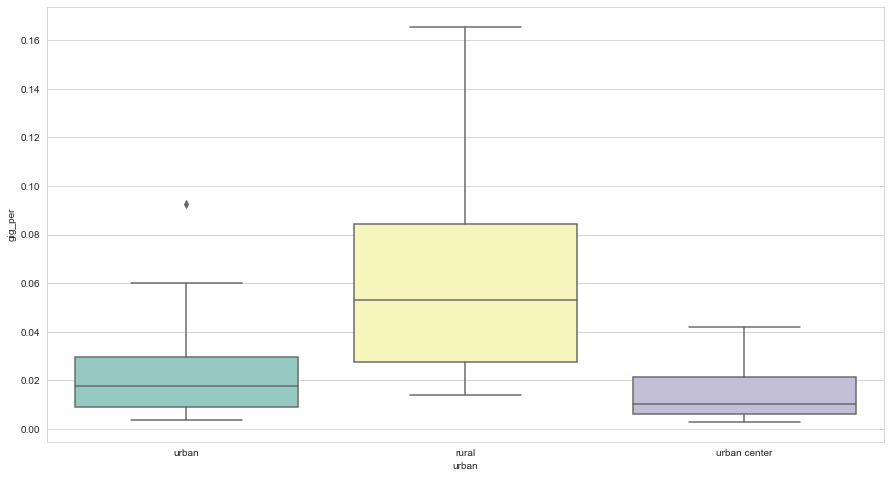

In [9]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="urban", y="gig_per",               
data=df, palette="Set3")

In [10]:
urban = df[df["urban"]=='urban']['gig_per']
urban_center = df[df["urban"]=='urban center']['gig_per']
rural = df[df["urban"]=='rural']['gig_per']

In [11]:
def hist_data(data):
    plt.hist(data, color = 'c', edgecolor='black',alpha=0.65,bins = 15)
    plt.axvline(data.mean(), color='r', linestyle='dashed', linewidth=1)
    plt.axvline(data.median(), color='b', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(data.mean()*1.06, max_ylim*0.9, 'Mean: {:.2f}'.format(data.mean()))  

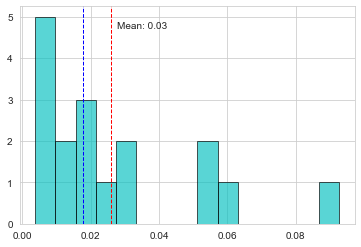

In [12]:
hist_data(urban)

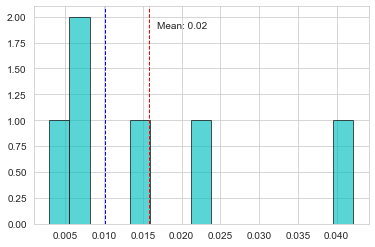

In [13]:
hist_data(urban_center)

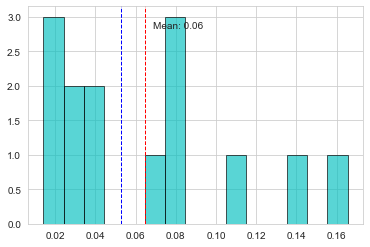

In [14]:
hist_data(rural)

In [15]:
def hist_all(labels,*data):
    plt.figure(figsize=(17,8))
    i = 0
    op = 0.7
    c = list(mcolors.BASE_COLORS.keys())
    plt.hist(data,color = c[:len(labels)], alpha=op-i*0.2,bins = 10, label = labels, range = [0,0.2])
    plt.xlabel('percentage of gig workers')
    plt.title(' vs. '.join(labels)+' histogram')
    plt.legend()
    plt.show()

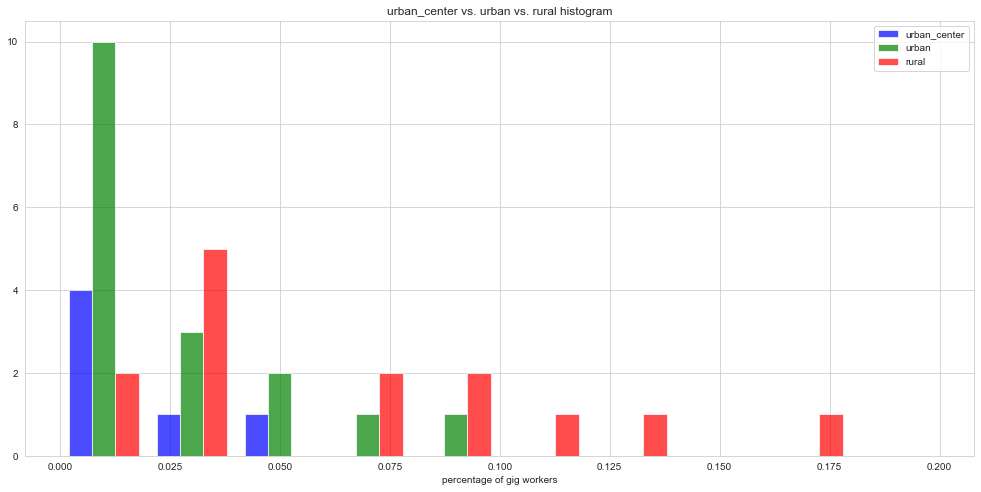

In [16]:
hist_all(['urban_center','urban','rural'],urban_center,urban,rural)

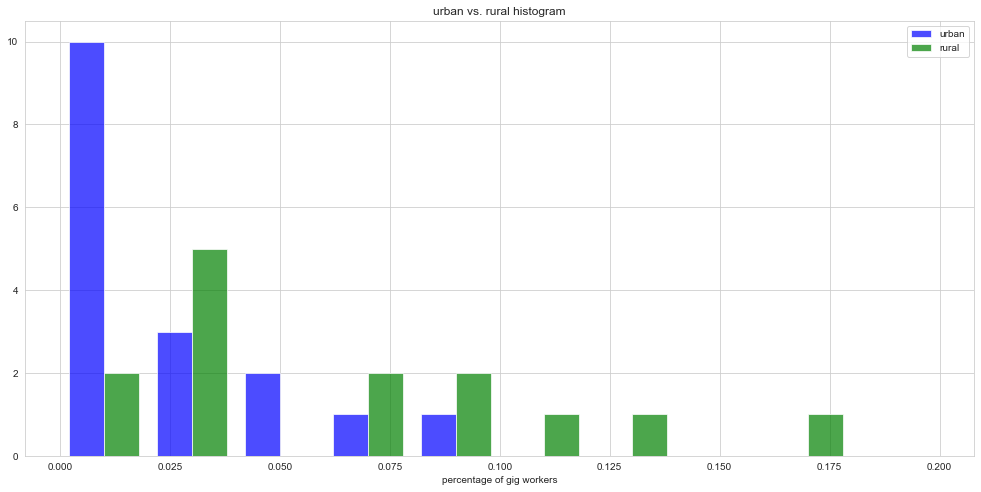

In [17]:
hist_all(['urban','rural'],urban,rural)

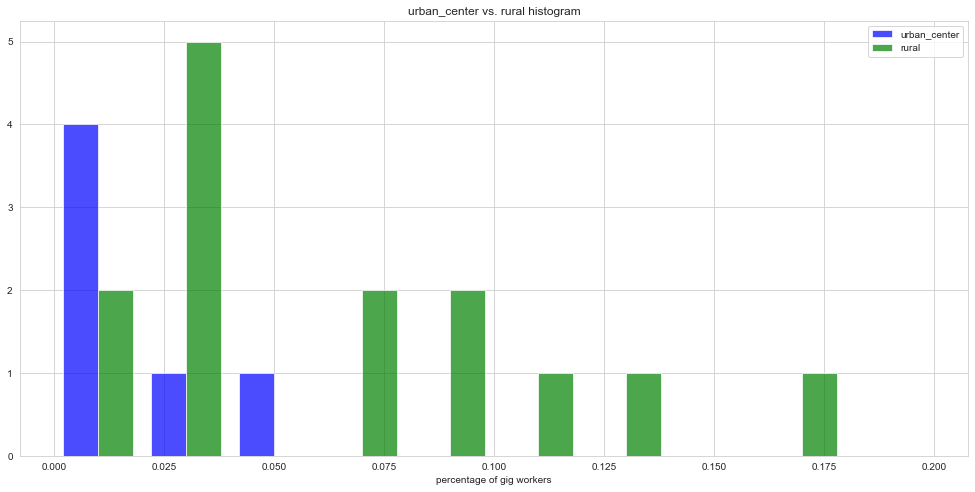

In [18]:
hist_all(['urban_center','rural'],urban_center,rural)

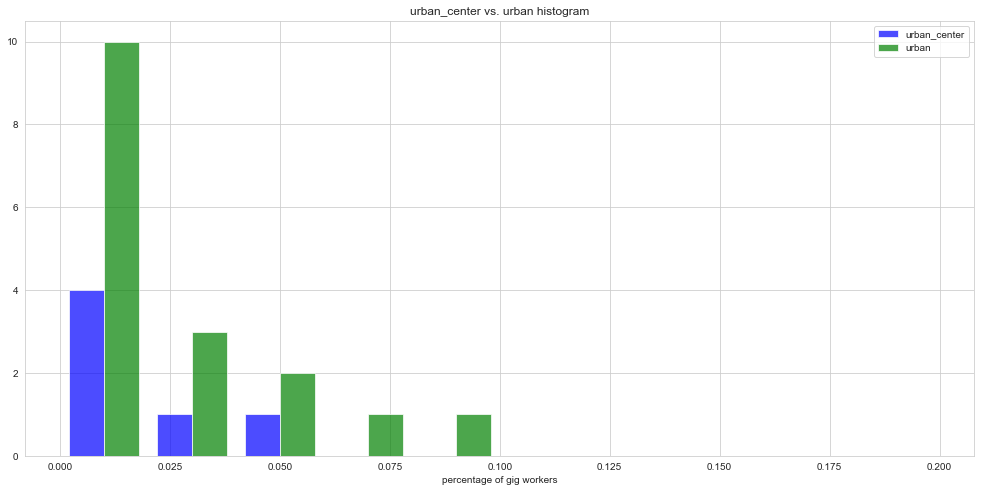

In [19]:
hist_all(['urban_center','urban'],urban_center,urban)

In [20]:
def draw_worker_density(xv,yv):
    ax = sns.scatterplot(x=xv, y=yv, data=df)
    ax.set_title(yv+" vs. "+xv)
    ax.set_xlabel(xv)

(0.26910398464939683, 0.10727085830768367)

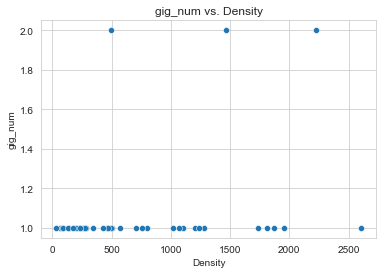

In [21]:
from scipy import stats
draw_worker_density('Density','gig_num')
stats.pearsonr(df['Density'], df['gig_num'])

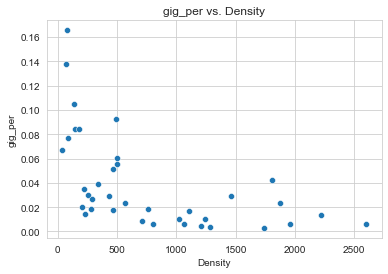

In [22]:
stats.pearsonr(df['Density'], df['gig_per'])
draw_worker_density('Density','gig_per')